In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [3]:
data=pd.read_csv('ML_Data_CW.csv')

In [4]:
data

,label,X_min,X_max,X_range,X_mean,X_rms,X_std,Y_min,Y_max,Y_range,...,Z_jerk_mean,Z_jerk_rms,Z_jerk_std,total_jerk_min,total_jerk_max,total_jerk_range,total_jerk_mean,total_jerk_rms,total_jerk_std,timestamp_range
0,1,-0.589872,0.347272,0.937143,-0.194542,0.268091,0.185794,-1.267788,0.004404,1.272193,...,-0.275866,16.042870,16.156316,-24.266511,29.783611,54.050122,-0.272102,11.621308,11.702008,0.759
1,1,-0.678279,0.259369,0.937648,-0.200295,0.283716,0.202370,-2.018337,0.155951,2.174288,...,-0.017593,19.087411,19.223258,-47.033978,40.079267,87.113246,0.439634,14.617773,14.715156,0.770
2,1,-0.703621,0.355244,1.058865,-0.209411,0.300929,0.217460,-1.167808,-0.012946,1.154862,...,1.017398,12.942794,12.983137,-23.432654,30.300758,53.733412,0.677985,10.235956,10.277114,0.880
3,1,-0.711522,0.555218,1.266740,-0.207122,0.319552,0.244856,-1.471754,-0.024032,1.447722,...,-1.453922,12.462453,12.454471,-29.483934,22.118163,51.602097,-1.472199,10.735650,10.700486,0.880
4,1,-0.676285,0.676534,1.352819,-0.070346,0.298983,0.292520,-1.130257,0.102537,1.232795,...,3.066248,16.538112,16.359362,-28.066213,35.876247,63.942460,2.549368,12.604363,12.425872,0.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,4,-0.953433,0.250183,1.203616,-0.267446,0.335269,0.203024,-0.800211,0.143310,0.943521,...,0.247229,9.659509,9.696496,-22.074841,23.390863,45.465704,0.201233,6.968500,6.994557,1.320
2549,4,-0.633834,1.097093,1.730927,-0.075134,0.373065,0.367049,-1.246303,0.299869,1.546173,...,-0.056797,14.140192,14.203063,-52.673864,46.050547,98.724410,0.001120,14.968089,15.034762,1.232
2550,4,-1.385272,0.583667,1.968939,-0.247752,0.407022,0.324163,-1.960975,0.035151,1.996125,...,0.071263,15.528399,15.587391,-45.077351,54.306146,99.383498,0.082529,12.754323,12.802643,1.441
2551,4,-0.676367,0.664444,1.340811,-0.164913,0.298208,0.249576,-0.899431,0.297562,1.196992,...,-0.096257,9.774722,9.818178,-32.409254,25.582425,57.991680,-0.220048,8.565381,8.601038,1.221


In [5]:
x=data.drop(['label'], axis=1)
y=data['label']

In [6]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.15, random_state=42)
x_train.shape, x_test.shape

((2170, 43), (383, 43))

In [7]:
scaled=StandardScaler()
x_train_s=scaled.fit_transform(x_train)
x_test_s=scaled.fit_transform(x_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score

# Random Forest Classifier

In [9]:
model=RandomForestClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9921658986175115

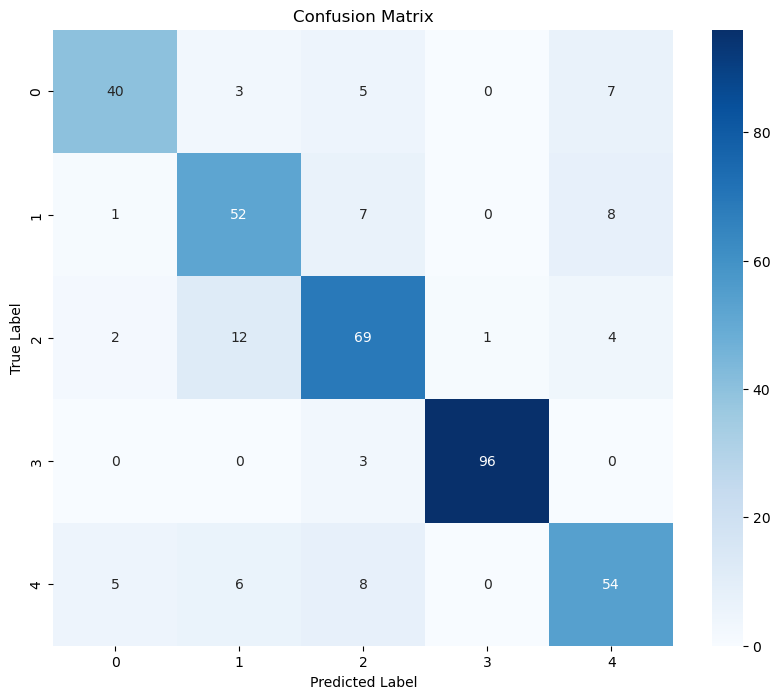

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        55
           1       0.71      0.76      0.74        68
           2       0.75      0.78      0.77        88
           3       0.99      0.97      0.98        99
           4       0.74      0.74      0.74        73

    accuracy                           0.81       383
   macro avg       0.81      0.80      0.80       383
weighted avg       0.82      0.81      0.81       383



In [10]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# Gradient Boosting

In [11]:
model=GradientBoostingClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9806451612903225

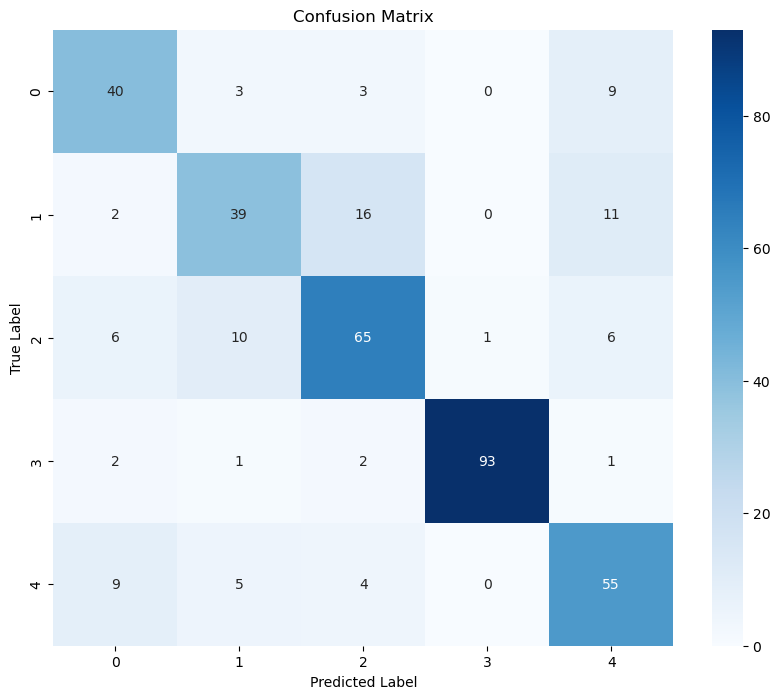

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        55
           1       0.67      0.57      0.62        68
           2       0.72      0.74      0.73        88
           3       0.99      0.94      0.96        99
           4       0.67      0.75      0.71        73

    accuracy                           0.76       383
   macro avg       0.75      0.75      0.74       383
weighted avg       0.77      0.76      0.76       383



In [12]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# LGBM

In [13]:
model=LGBMClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10837
[LightGBM] [Info] Number of data points in the train set: 2170, number of used features: 43
[LightGBM] [Info] Start training from score -1.739683
[LightGBM] [Info] Start training from score -1.611745
[LightGBM] [Info] Start training from score -1.461892
[LightGBM] [Info] Start training from score -1.521275
[LightGBM] [Info] Start training from score -1.744946
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.9921658986175115

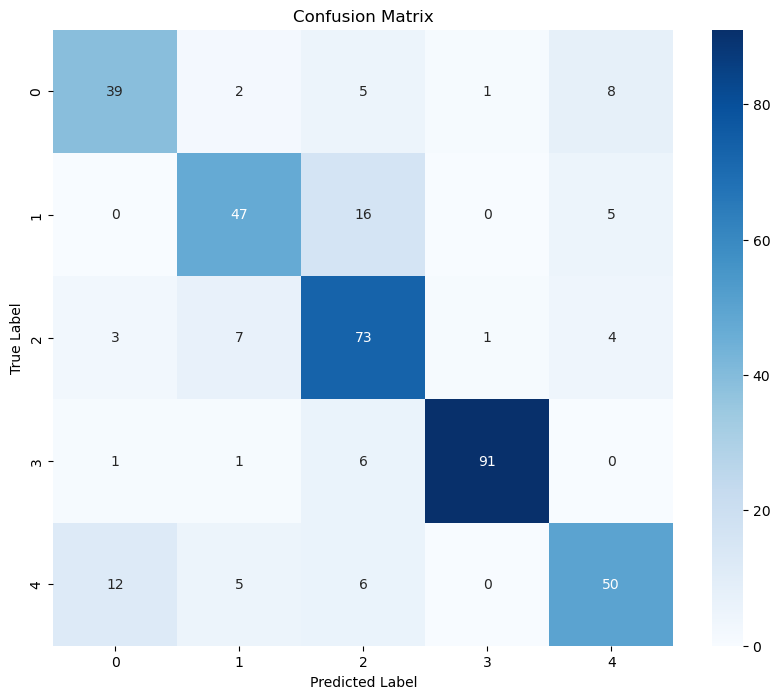

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        55
           1       0.76      0.69      0.72        68
           2       0.69      0.83      0.75        88
           3       0.98      0.92      0.95        99
           4       0.75      0.68      0.71        73

    accuracy                           0.78       383
   macro avg       0.78      0.77      0.77       383
weighted avg       0.79      0.78      0.78       383



In [14]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# XGBoost

In [15]:
model=XGBClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9921658986175115

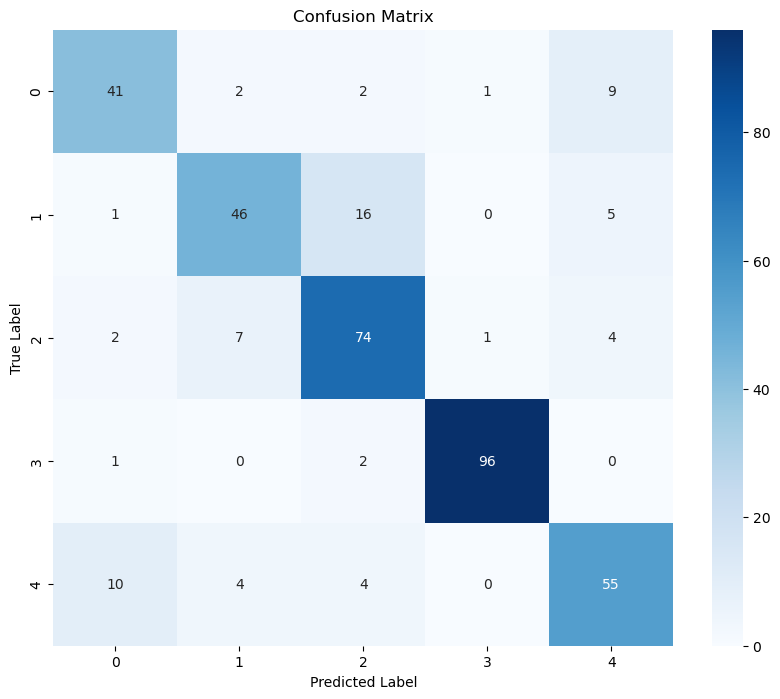

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        55
           1       0.78      0.68      0.72        68
           2       0.76      0.84      0.80        88
           3       0.98      0.97      0.97        99
           4       0.75      0.75      0.75        73

    accuracy                           0.81       383
   macro avg       0.80      0.80      0.80       383
weighted avg       0.82      0.81      0.81       383



In [16]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

# HistGradient Boosting

In [17]:
model=HistGradientBoostingClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9921658986175115

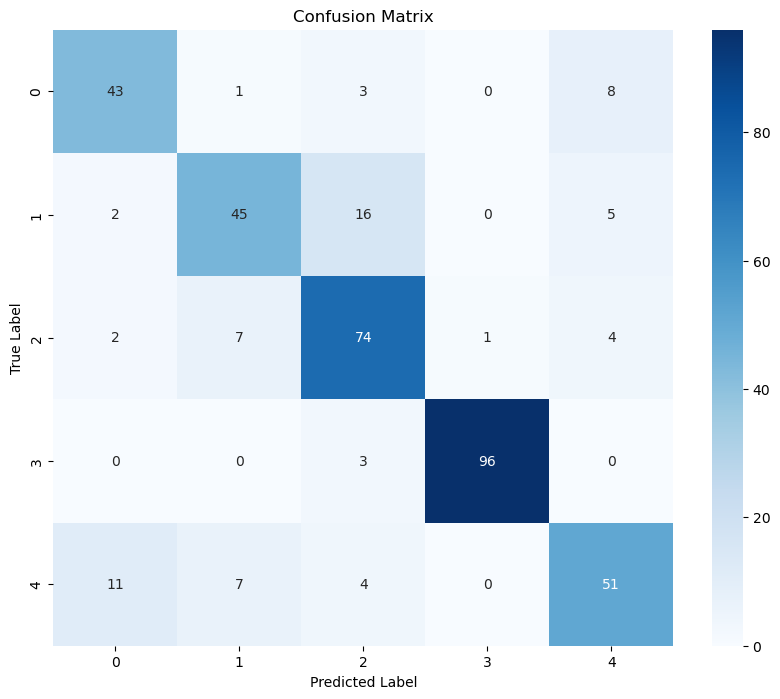

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        55
           1       0.75      0.66      0.70        68
           2       0.74      0.84      0.79        88
           3       0.99      0.97      0.98        99
           4       0.75      0.70      0.72        73

    accuracy                           0.81       383
   macro avg       0.79      0.79      0.79       383
weighted avg       0.81      0.81      0.81       383



In [18]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)